In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Jupiter magic command, read above
%matplotlib inline

In [2]:
df = pd.read_csv('../data/GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2021-04-21,2272.050049,2280.000000,2244.820068,2278.350098,2278.350098,1160200
249,2021-04-22,2275.399902,2288.879883,2240.320068,2252.520020,2252.520020,1207300
250,2021-04-23,2267.000000,2306.120117,2261.250000,2299.929932,2299.929932,1453300
251,2021-04-26,2304.520020,2324.530029,2297.320068,2309.929932,2309.929932,1595200
252,2021-04-27,2317.632568,2317.632568,2286.159912,2290.979980,2290.979980,1756799


In [4]:
df = df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
df.head()

,Date,Close
0,2020-04-27,1270.859985
1,2020-04-28,1232.589966
2,2020-04-29,1342.180054
3,2020-04-30,1346.699951
4,2020-05-01,1317.319946


In [5]:
train = df[:248]
test = df[248:]

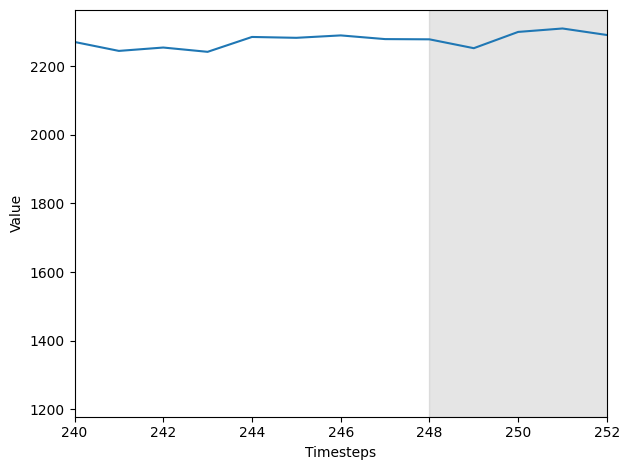

In [6]:
fig, ax = plt.subplots()

ax.plot(df["Close"])
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.set_xlim(240, 252)
ax.axvspan(248, 253, color='#808080', alpha=0.2)

plt.tight_layout()
plt.savefig('figures/CH03_exercise_3.5.2_figure_1.png', dpi=300)

In [7]:
# Predict the historical mean

mean = np.mean(train["Close"])

test.loc[:, 'pred_mean'] = mean

test.head()

,Date,Close,pred_mean
248,2021-04-21,2278.350098,1689.993184
249,2021-04-22,2252.520020,1689.993184
250,2021-04-23,2299.929932,1689.993184
251,2021-04-26,2309.929932,1689.993184
252,2021-04-27,2290.979980,1689.993184


In [8]:
# Predict the last known value

last_value = train["Close"].iloc[-1]

test.loc[:, 'pred_last'] = last_value

test.head()

,Date,Close,pred_mean,pred_last
248,2021-04-21,2278.350098,1689.993184,2279.01001
249,2021-04-22,2252.520020,1689.993184,2279.01001
250,2021-04-23,2299.929932,1689.993184,2279.01001
251,2021-04-26,2309.929932,1689.993184,2279.01001
252,2021-04-27,2290.979980,1689.993184,2279.01001


In [9]:
# Predict with the drift method
# Drift method: same historical average rate of change, same historical slope

deltaX = 248 - 1
deltaY = last_value - train['Close'].iloc[0]  

drift = deltaY / deltaX

x_vals = np.arange(248, 253, 1)

pred_drift = train['Close'].iloc[0] + drift * x_vals

test.loc[:, 'pred_drift'] = pred_drift

test

,Date,Close,pred_mean,pred_last,pred_drift
248,2021-04-21,2278.350098,1689.993184,2279.01001,2283.091589
249,2021-04-22,2252.520020,1689.993184,2279.01001,2287.173168
250,2021-04-23,2299.929932,1689.993184,2279.01001,2291.254747
251,2021-04-26,2309.929932,1689.993184,2279.01001,2295.336326
252,2021-04-27,2290.979980,1689.993184,2279.01001,2299.417905


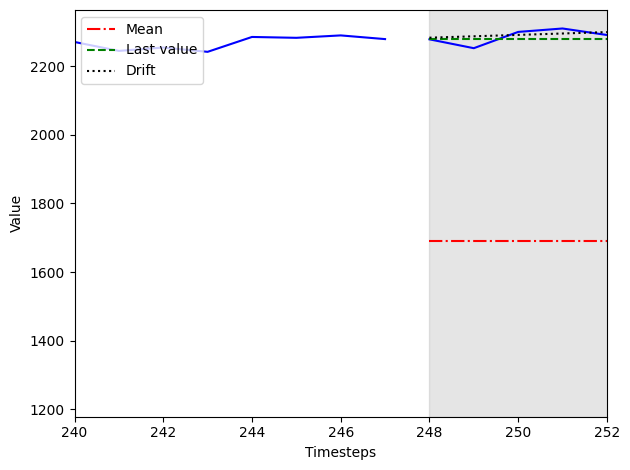

In [10]:
# Prediction with naive methods

fig, ax = plt.subplots()

ax.plot(train["Close"], 'b-')
ax.plot(test['Close'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(248, 253, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.set_xlim(240, 252)

plt.tight_layout()
plt.savefig('figures/CH03_exercise_3.5.2_figure_2.png', dpi=300)

In [11]:
# MSE of the prediction of the test set

from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['Close'], test['pred_mean'])
mse_last = mean_squared_error(test['Close'], test['pred_last'])
mse_drift = mean_squared_error(test['Close'], test['pred_drift'])

print(mse_mean, mse_last, mse_drift)

356025.96701539395 447.82398976418415 316.5506310959176


### Forecasting the next timestep 

Specifically, we will predict the last known value

In [12]:
df_shift = df.shift(periods=1)

df_shift.head()

,Date,Close
0,None,NaN
1,2020-04-27,1270.859985
2,2020-04-28,1232.589966
3,2020-04-29,1342.180054
4,2020-04-30,1346.699951


In [13]:

df_shift.tail()

,Date,Close
248,2021-04-20,2279.010010
249,2021-04-21,2278.350098
250,2021-04-22,2252.520020
251,2021-04-23,2299.929932
252,2021-04-26,2309.929932


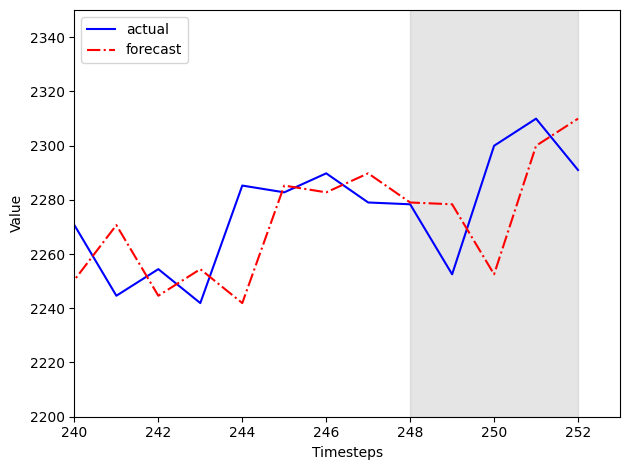

In [14]:
# Actual values and predicted drifted values

fig, ax = plt.subplots()

ax.plot(df['Close'], 'b-', label='actual')
ax.plot(df_shift['Close'], 'r-.', label='forecast')

ax.axvspan(248, 252, color='#808080', alpha=0.2)

ax.legend(loc=2)

ax.set_xlim(240, 253)
ax.set_ylim(2200, 2350)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

plt.savefig('figures/CH03_exercise_3.5.2_figure_3.png', dpi=300)

In [15]:
# MSE of the prediction of the test set

mse_one_step = mean_squared_error(test['Close'], df_shift['Close'][248:])

mse_one_step

674.8857699967758